In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data is without labels and need to be clustered together.
1. For each data point in training set, calculate the distance between datapoint and centroid.
   - Find centroid that has min distance
   - assign datapoint to that centroid
2. For each centroid
   - Update centroid as mean of all data pts assigned to that particular centroid
   - Sake of simplicity, centroid initialized with random values between 0 & 1. Vector with d-features. Random floats within that vector.

predict function : A new data point and assign a cluster to that point
                    Eucliden distance between two data points. (data point and centroid)

KMeans: Class => functionalities i.e prediction, fit, initialization, etc

centroid: Class => location, vectors that are part of that centroid. Which data points belong to that cluster.

In [2]:
from dataclasses import dataclass
import random

@dataclass
class Centroid:
    location: np.ndarray # (D,)
    vectors: np.ndarray  # (N_i, D)

In [369]:
class KMeans:
    def __init__(self, n_features: int, k: int, X):
        self.n_features = n_features
        self.k = k

        self.centroids = [
            Centroid(
                location = self.random_location_generator(X),
                vectors = np.empty((0, self.n_features))
            )
            for _ in range(k)
        ] 

    def distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.sqrt((x-y).T.dot(x-y))

    def fit(self, X: np.ndarray, n_iterations: int):
        for _ in range(n_iterations):
            
            # start initialization over again
            for centroid in self.centroids:
                centroid.vectors = np.empty((0, self.n_features))

            for x_i in X.values:
                distances = [
                    self.distance(x_i, centroid.location) for centroid in self.centroids
                ]
                
                min_idx = distances.index(min(distances))
                cur_vectors = self.centroids[min_idx].vectors
                
                self.centroids[min_idx].vectors = np.vstack((cur_vectors, x_i))

            # Update the centroids now
            for centroid in self.centroids:
                centroid.location = np.mean(centroid.vectors, axis=0)

                
    def predict(self, x: np.ndarray) -> int:
        distance = [
            self.distance(x, centroid.location) for centroid in self.centroids
        ]

        return distance.index(min(distance))

    def random_location_generator(self, X):
        min_values = X.min()
        max_values = X.max()

        return np.random.uniform(min_values, max_values)

    def plot(self):

        locations = [centroid.location for centroid in self.centroids]
        x = []
        y = []
        for loc in locations:
            x.append(loc[1])
            y.append(loc[3])

        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, color='black')
        
        vectors = [centroid.vectors for centroid in self.centroids]
        for vector in vectors:
            a = []
            b = []
            for row in vector:
                a.append(row[1])
                b.append(row[3])
                
            plt.scatter(a, b, marker='o', s=50, alpha=0.5)
        
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()     

How to evaluate data points that are clustered?
- It is hard to evaluate as it is unsupervised problem
- Variance in that cluster. High variance inside a cluster is a problem

- Name of the Centroid class can be named as Cluster as it has information regarding all points: centroid as well as data points

In [61]:
dataset = pd.read_csv("Mall_Customers.csv")

In [62]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
dataset = dataset.drop(columns='CustomerID', axis=1)

In [64]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [65]:
dataset['Gender'] = dataset['Gender'].map({"Male":1, "Female":0})

In [66]:
dataset.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [67]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X = scaler.fit_transform(dataset)

In [261]:
X = dataset

In [366]:
k_means = KMeans(4,4,X)
k_means.fit(X,100)

[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.41176471 38.61344538 45.86554622 45.05882353]
[ 0.46666667 51.86666667 51.73333333 65.86666667]
[ 0.51851852 41.55555556 92.7037037  18.03703704]
[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.36904762 36.16666667 43.51190476 43.42857143]
[ 0.5   49.125 46.175 62.9  ]
[ 0.51351351 40.32432432 87.43243243 18.18918919]
[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.36764706 36.29411765 44.32352941 39.36764706]
[ 0.45454545 45.30909091 43.94545455 62.76363636]
[ 0.52631579 40.39473684 87.         18.63157895]
[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.38235294 37.69117647 45.5        38.52941176]
[ 0.43636364 43.58181818 42.49090909 63.8       ]
[ 0.52631579 40.39473684 87.         18.63157895]
[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.39705882 39.88235294 46.22058824 37.83823529]
[ 0.41818182 40.87272727 41.6        64.65454545]
[ 0.52631579 40.39473684 87.         18.63157895]
[ 0.46153846 32.6923

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


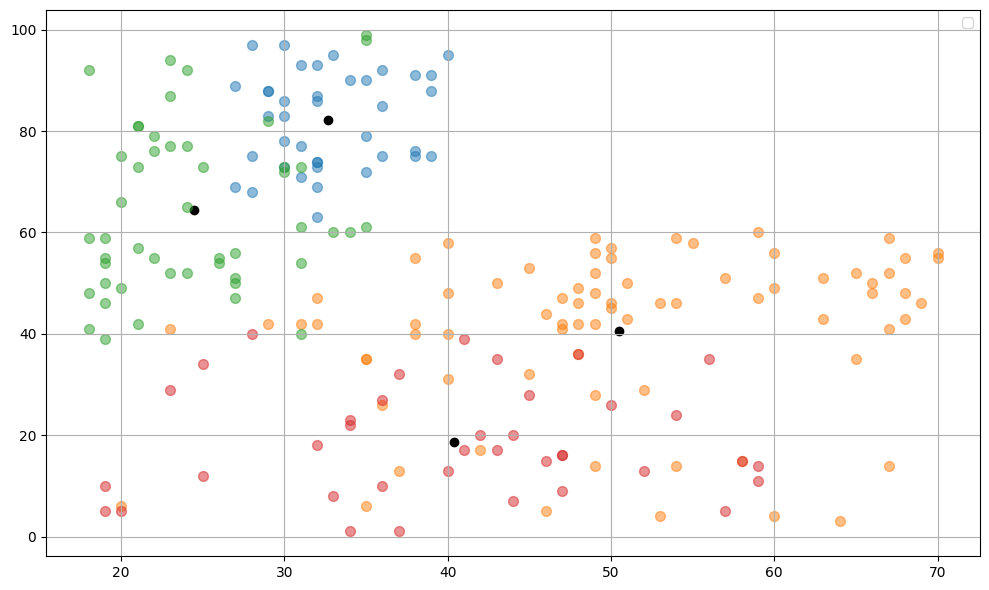

In [367]:
k_means.plot()